
<p align="center">
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width=300 />
</p>


# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Note: Please ensure all the required libraries are installed and imported.

1 .Load the dataset:
Use `pd.read_csv()` to load the dataset into a pandas DataFrame.</br>
2. Split data into features and target: Separate win (target) and the remaining columns (features).</br>
   X = data.drop('win', axis=1)</br>
   y = data['win'] </br>
3 .Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.</br>
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.</br>
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [1]:
!pip install pandas scikit-learn torch matplotlib seaborn ray[tune]

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 3.6 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 3.6 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 3.6 MB/s eta 0:00:0000:010

## Load dataset

In [ ]:
## Write your code here
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from ray import tune

lol_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv"
lol_data = pd.read_csv(lol_url)

/home/pedro/anaconda3/envs/intellissis-ai/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-02 09:31:54,614	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-05-02 09:31:54,730	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


## Perform basic exploratory data analysis (EDA)

In [3]:
lol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   win           1000 non-null   int64
 1   kills         1000 non-null   int64
 2   deaths        1000 non-null   int64
 3   assists       1000 non-null   int64
 4   gold_earned   1000 non-null   int64
 5   cs            1000 non-null   int64
 6   wards_placed  1000 non-null   int64
 7   wards_killed  1000 non-null   int64
 8   damage_dealt  1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


In [4]:
lol_data.isnull().sum()

win             0
kills           0
deaths          0
assists         0
gold_earned     0
cs              0
wards_placed    0
wards_killed    0
damage_dealt    0
dtype: int64

In [5]:
lol_data.describe()

,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.51000,9.332000,9.487000,9.395000,12433.808000,181.21300,9.834000,4.541000,27484.905000
std,0.50015,5.798569,5.773488,5.765086,4388.138751,72.11491,5.739633,2.906332,13221.571932
min,0.00000,0.000000,0.000000,0.000000,5002.000000,50.00000,0.000000,0.000000,5028.000000
25%,0.00000,4.000000,4.000000,4.000000,8551.750000,121.00000,5.000000,2.000000,15759.000000
50%,1.00000,9.000000,9.000000,10.000000,12295.000000,183.50000,10.000000,5.000000,27370.000000
75%,1.00000,14.000000,14.000000,14.000000,16348.250000,243.00000,15.000000,7.000000,39453.000000
max,1.00000,19.000000,19.000000,19.000000,19955.000000,299.00000,19.000000,9.000000,49927.000000


In [6]:
lol_data.count()

win             1000
kills           1000
deaths          1000
assists         1000
gold_earned     1000
cs              1000
wards_placed    1000
wards_killed    1000
damage_dealt    1000
dtype: int64

In [7]:
lol_data["win"].value_counts()

win
1    510
0    490
Name: count, dtype: int64

In [8]:
lol_data.head()

,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,0,16,6,19,17088,231,11,7,15367
1,1,8,8,5,14865,259,10,2,38332
2,0,0,17,11,15919,169,14,5,24642
3,0,19,11,1,11534,264,14,3,15789
4,0,12,7,6,18926,124,15,7,40268


## Search for correlations

In [9]:
corr_matrix = lol_data.corr()
corr_matrix

,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
win,1.000000,0.066849,-0.010181,-0.000503,0.061942,0.006837,0.046607,-0.004070,-0.023582
kills,0.066849,1.000000,0.038700,-0.033751,0.052383,-0.013041,0.016034,0.039582,-0.006352
deaths,-0.010181,0.038700,1.000000,-0.045814,0.039220,0.018713,-0.015924,-0.059266,0.002714
assists,-0.000503,-0.033751,-0.045814,1.000000,0.074026,-0.011656,-0.005307,-0.005418,0.012722
gold_earned,0.061942,0.052383,0.039220,0.074026,1.000000,0.019875,0.026857,0.076122,0.039797
cs,0.006837,-0.013041,0.018713,-0.011656,0.019875,1.000000,-0.022309,0.039869,0.051233
wards_placed,0.046607,0.016034,-0.015924,-0.005307,0.026857,-0.022309,1.000000,0.047094,0.000022
wards_killed,-0.004070,0.039582,-0.059266,-0.005418,0.076122,0.039869,0.047094,1.000000,-0.005216
damage_dealt,-0.023582,-0.006352,0.002714,0.012722,0.039797,0.051233,0.000022,-0.005216,1.000000


In [10]:
# Most correlated column with our target 
corr_matrix["win"].abs().sort_values(ascending=False)

win             1.000000
kills           0.066849
gold_earned     0.061942
wards_placed    0.046607
damage_dealt    0.023582
deaths          0.010181
cs              0.006837
wards_killed    0.004070
assists         0.000503
Name: win, dtype: float64

As we can see, the most correlated column with our target variable (win) is the number of kills.

## Prepare data for training

In [ ]:
X = lol_data.drop("win", axis=1)
y = lol_data["win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize feature sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert our sets to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Series.values
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

1 .Define the Logistic Regression Model:</br>
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.</br>
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.</br>
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.</br>

2.Initialize the Model, Loss Function, and Optimizer:</br>
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).</br>
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter</br>
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).</br>
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01</br>

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [ ]:
## Write your code here
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        x = self.linear(x)
        x = torch.sigmoid(x)
        return x


input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [38]:
# Write your code here

# The training code is really big, so lets create a reusable function
def train_binary_classifier(
    model,
    train_dataloader,
    test_dataloader,
    criterion,
    optimizer,
    epochs=1000,
    threshold=0.5,
):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        # Treinamento
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for X_batch, y_batch in train_dataloader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            preds = (outputs >= threshold).float()
            # preds = tensor([[1.], [0.], [0.], [1.], [1.]])
            correct_train += (preds == y_batch).sum().item()
            # preds == y_batch → tensor([[True], [True], [True], [True], [True]])
            total_train += y_batch.size(0)

        train_loss /= len(train_dataloader)
        train_acc = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Avaliação
        model.eval()
        test_loss = 0.0
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for X_batch, y_batch in test_dataloader:
                test_outputs = model(X_batch)
                loss = criterion(test_outputs, y_batch)
                test_loss += loss.item()

                preds = (test_outputs >= threshold).float()
                correct_test += (preds == y_batch).sum().item()
                total_test += y_batch.size(0)

        test_loss /= len(test_dataloader)
        test_acc = correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

        if (epoch + 1) % 100 == 0 or epoch == epochs - 1:
            print(f'Epoch [{epoch + 1}/{epochs}] - '
                  f'Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, '
                  f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
            
    return {
        "train_losses": train_losses,
        "test_losses": test_losses,
        "train_accuracies": train_accuracies,
        "test_accuracies": test_accuracies
    }


metrics = train_binary_classifier(
    model,
    train_dataloader,
    test_dataloader,
    criterion,
    optimizer
)

train_losses = metrics["train_losses"]
test_losses = metrics["test_losses"]
train_accuracies = metrics["train_accuracies"]
test_accuracies = metrics["test_accuracies"]

Epoch [100/1000] - Train Loss: 0.6916, Test Loss: 0.6831, Train Acc: 0.5200, Test Acc: 0.5500
Epoch [200/1000] - Train Loss: 0.6916, Test Loss: 0.6827, Train Acc: 0.5225, Test Acc: 0.5450
Epoch [300/1000] - Train Loss: 0.6916, Test Loss: 0.6828, Train Acc: 0.5250, Test Acc: 0.5450
Epoch [400/1000] - Train Loss: 0.6916, Test Loss: 0.6832, Train Acc: 0.5162, Test Acc: 0.5350
Epoch [500/1000] - Train Loss: 0.6917, Test Loss: 0.6826, Train Acc: 0.5075, Test Acc: 0.5450
Epoch [600/1000] - Train Loss: 0.6916, Test Loss: 0.6831, Train Acc: 0.5162, Test Acc: 0.5400
Epoch [700/1000] - Train Loss: 0.6917, Test Loss: 0.6829, Train Acc: 0.5188, Test Acc: 0.5400
Epoch [800/1000] - Train Loss: 0.6915, Test Loss: 0.6830, Train Acc: 0.5175, Test Acc: 0.5350
Epoch [900/1000] - Train Loss: 0.6916, Test Loss: 0.6832, Train Acc: 0.5288, Test Acc: 0.5350
Epoch [1000/1000] - Train Loss: 0.6917, Test Loss: 0.6830, Train Acc: 0.5188, Test Acc: 0.5400


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [39]:
## Write your code here
model = LogisticRegression(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2, weight_decay=1e-2)

metrics = train_binary_classifier(
    model,
    train_dataloader,
    test_dataloader,
    criterion,
    optimizer
)

Epoch [100/1000] - Train Loss: 0.6916, Test Loss: 0.6832, Train Acc: 0.5325, Test Acc: 0.5300
Epoch [200/1000] - Train Loss: 0.6916, Test Loss: 0.6834, Train Acc: 0.5250, Test Acc: 0.5400
Epoch [300/1000] - Train Loss: 0.6917, Test Loss: 0.6830, Train Acc: 0.5175, Test Acc: 0.5550
Epoch [400/1000] - Train Loss: 0.6916, Test Loss: 0.6829, Train Acc: 0.5200, Test Acc: 0.5450
Epoch [500/1000] - Train Loss: 0.6915, Test Loss: 0.6831, Train Acc: 0.5200, Test Acc: 0.5450
Epoch [600/1000] - Train Loss: 0.6916, Test Loss: 0.6830, Train Acc: 0.5225, Test Acc: 0.5350
Epoch [700/1000] - Train Loss: 0.6917, Test Loss: 0.6831, Train Acc: 0.5375, Test Acc: 0.5550
Epoch [800/1000] - Train Loss: 0.6916, Test Loss: 0.6835, Train Acc: 0.5138, Test Acc: 0.5400
Epoch [900/1000] - Train Loss: 0.6916, Test Loss: 0.6832, Train Acc: 0.5200, Test Acc: 0.5450
Epoch [1000/1000] - Train Loss: 0.6917, Test Loss: 0.6830, Train Acc: 0.5150, Test Acc: 0.5350


## Notes

With L2 regularization the model didn't overfit and the test accuracy was slightly improved on the same dataset.

### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where 
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error. 

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC: 
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


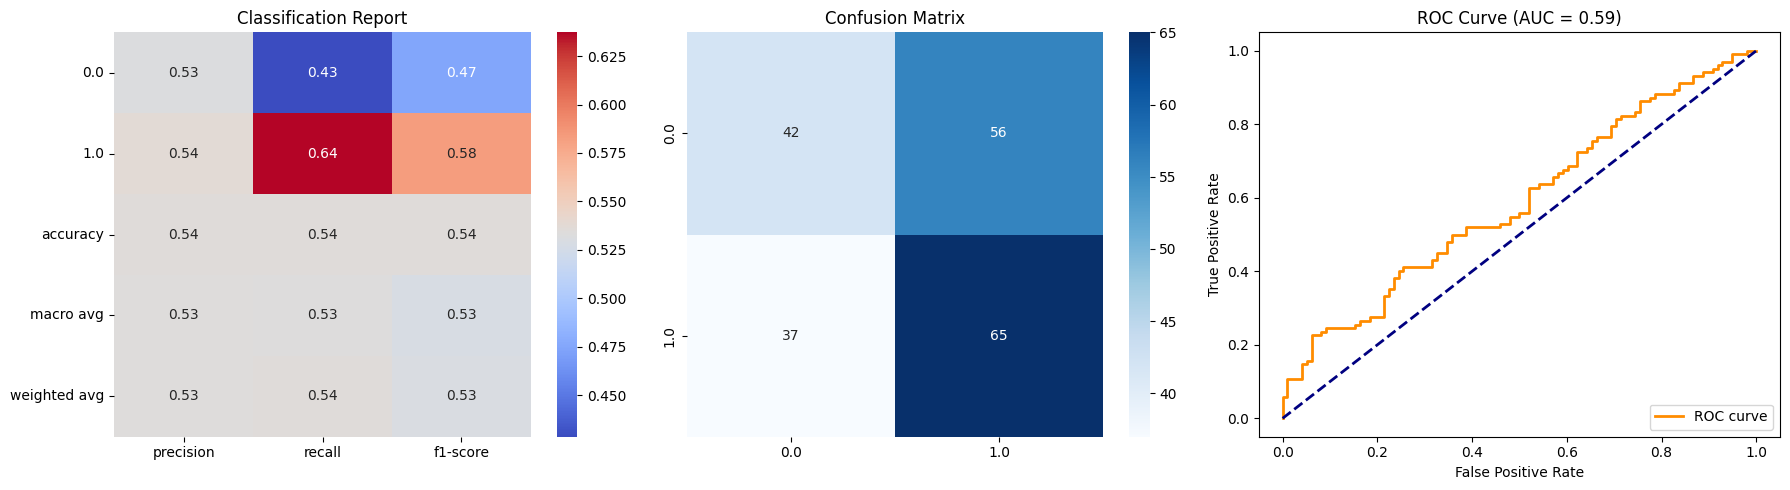

In [40]:
## Write your code here

# This is a function which I always use in my personal toolkit
def plot_conf_matrix_report(y_pred, y_true, y_score):
    # Converte tensores para NumPy arrays
    y_pred = y_pred.detach().numpy().flatten()
    y_true = y_true.detach().numpy().flatten()
    y_score = y_score.detach().numpy().flatten()

    plt.figure(figsize=(18, 5))  # Aumenta o espaço para 3 subplots

    # Subplot 1 - Classification Report
    plt.subplot(1, 3, 1)
    plt.title('Classification Report')
    clf_report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(clf_report).iloc[:-1, :].T
    sns.heatmap(report_df, annot=True, cmap='coolwarm', fmt=".2f")

    # Subplot 2 - Confusion Matrix
    plt.subplot(1, 3, 2)
    plt.title('Confusion Matrix')
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))

    # Subplot 3 - ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 3, 3)
    plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()


def evaluate_model(model, test_dataloader, threshold=0.5):
    model.eval()
    y_preds = []
    y_scores = []
    y_trues = []
    
    with torch.no_grad():
        for X_batch, y_batch in test_dataloader:
            score = model(X_batch)
            pred = (score >= threshold).float()
    
            y_scores.append(score)
            y_preds.append(pred)
            y_trues.append(y_batch)
    
    # Junta tudo em um tensor só
    y_score = torch.cat(y_scores).squeeze()
    y_pred = torch.cat(y_preds).squeeze()
    y_true = torch.cat(y_trues).squeeze()

    return {
        "y_score": y_score,
        "y_pred": y_pred,
        "y_true": y_true,
    }

results = evaluate_model(model, test_dataloader)

# Plot
plot_conf_matrix_report(
    results["y_pred"], 
    results["y_true"], 
    results["y_score"]
)


Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


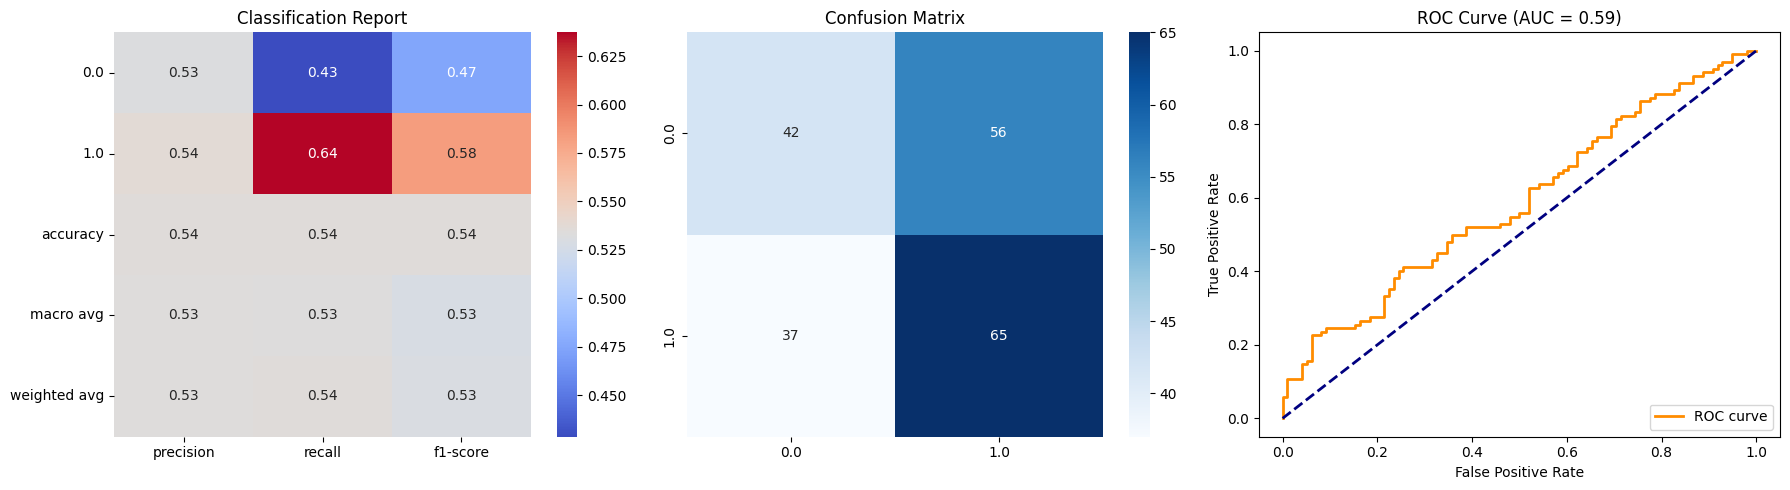

In [41]:
## Write your code here
# Save the model
torch.save(model.state_dict(), "my_model.pth")

# Load the model
model = LogisticRegression(input_dim)
model.load_state_dict(torch.load("my_model.pth"))

# Ensure the loaded model is in evaluation mode (inside function)
# Evaluate the loaded model (inside function)
results = evaluate_model(model, test_dataloader)

plot_conf_matrix_report(
    results["y_pred"], 
    results["y_true"], 
    results["y_score"]
)

### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance . 
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


## Notes

There is a great tuning library called `ray` which simplifiest the hyperparameter space searching. 

We will also improve our code with good pratices breaking it down in smaller, reusable functions.

### How to install
```bash
pip install ray[tune]
```
<br>

> See [install guide](https://docs.ray.io/en/latest/ray-overview/installation.html) for more informations

In [ ]:
## Write your code here

def get_device():
    return torch.device("cuda" if torch.cuda.is_available() else "cpu")


def train_one_epoch(model, dataloader, criterion, optimizer, device, threshold):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0.0
    
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = (outputs >= threshold).float()
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    train_loss = running_loss / len(dataloader) # Total loss mean
    train_acc = correct / total # Correctly predicted percentage 
    
    return train_loss, train_acc


def evaluate(model, dataloader, criterion, device, threshold):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0.0

    # Ensure no gradient calculations
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item()
            
            preds = (outputs >= threshold).float()
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    test_loss = running_loss / len(dataloader)
    test_acc = correct / total

    return test_loss, test_acc


def train_model(config, model_class, train_loader, test_loader):
    device = get_device()

    # We need to create a new model and optimizer for each new parameters
    model = model_class(config["input_dim"]).to(device)
    optimizer = optim.SGD(model.parameters(), lr=config["lr"])
    criterion = nn.BCELoss()

    for epoch in range(config["epochs"]):
        train_loss, train_acc = train_one_epoch(
            model, train_loader, criterion, optimizer, device, config["threshold"]
        )
        test_loss, test_acc = evaluate(
            model, test_loader, criterion, device, config["threshold"]
        )

        tune.report({
            "val_accuracy": test_acc,
            "val_loss": test_loss,
            "train_loss": train_loss,
            "train_acc": train_acc
        })


def run_tuning(model_class, train_loader, test_loader):
    config = {
        "lr": tune.grid_search([0.01, 0.05, 0.1]),
        "threshold": 0.5,
        "epochs": 10,
        "input_dim": input_dim
    }

    tuner = tune.Tuner(
        tune.with_parameters(
            train_model,
            model_class=model_class,
            train_loader=train_loader,
            test_loader=test_loader
        ),
        param_space=config,
        tune_config=tune.TuneConfig(metric="val_accuracy", mode="max")
    )
    tuner.fit()
    return tuner

    

In [43]:
tuner = run_tuning(LogisticRegression, train_dataloader, test_dataloader)

2025-05-02 10:32:22,987	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/home/pedro/ray_results/train_model_2025-05-02_10-32-17' in 0.0059s.
2025-05-02 10:32:22,992	INFO tune.py:1041 -- Total run time: 5.03 seconds (5.00 seconds for the tuning loop).


In [44]:
best_result = tuner.get_results()
best_result

ResultGrid<[
  Result(
    metrics={'val_accuracy': 0.53, 'val_loss': 0.6884929895401001, 'train_loss': 0.6923711824417115, 'train_acc': 0.51625},
    path='/home/pedro/ray_results/train_model_2025-05-02_10-32-17/train_model_de117_00000_0_lr=0.0100_2025-05-02_10-32-17',
    filesystem='local',
    checkpoint=None
  ),
  Result(
    metrics={'val_accuracy': 0.575, 'val_loss': 0.6763335132598877, 'train_loss': 0.6957719379663467, 'train_acc': 0.51},
    path='/home/pedro/ray_results/train_model_2025-05-02_10-32-17/train_model_de117_00001_1_lr=0.0500_2025-05-02_10-32-17',
    filesystem='local',
    checkpoint=None
  ),
  Result(
    metrics={'val_accuracy': 0.52, 'val_loss': 0.68729243516922, 'train_loss': 0.7001009398698806, 'train_acc': 0.51375},
    path='/home/pedro/ray_results/train_model_2025-05-02_10-32-17/train_model_de117_00002_2_lr=0.1000_2025-05-02_10-32-17',
    filesystem='local',
    checkpoint=None
  )
]>

## Notes

The maximun value for `val_accuracy` was 0.575 when learning rate was 0.01.

### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  


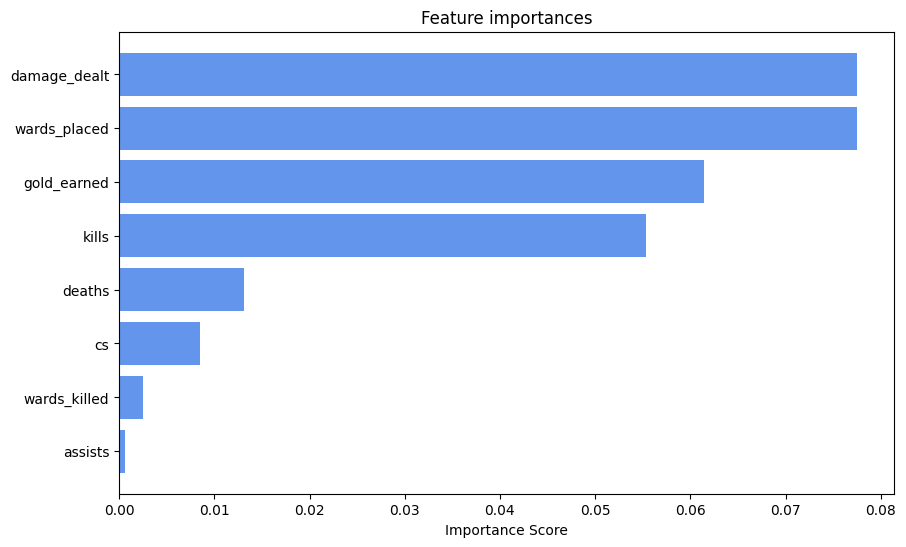

In [ ]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Extract the weights of the linear layer
## Write your code here
weights = model.linear.weight.data.numpy().flatten()

# Create a DataFrame for feature importance
## Write your code here
importances = pd.DataFrame({ "feature": X.columns, "importance": weights })
importances["importance"] = importances["importance"].abs()
importances = importances.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances["feature"], importances["importance"], color='cornflowerblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title("Feature importances")
plt.xlabel('Importance Weight')
plt.show();



Double-click <b>here</b> for the Hint
<!-- 
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
